# Example script for IDD


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Resistance in a two strain model (6.2)
(Resistant vs Sensitive strain)


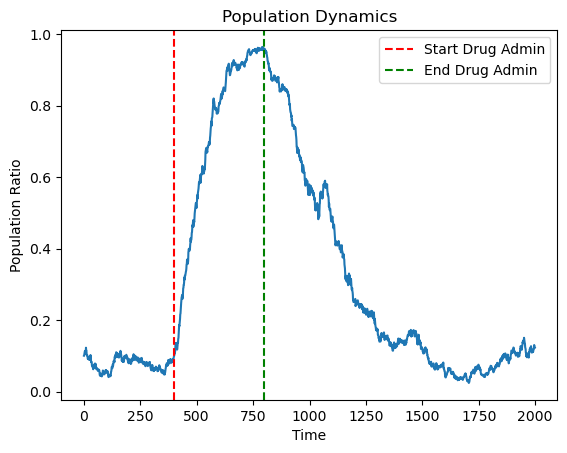

In [21]:

mu = 0.001          # Mutation rate
w_nodrug = 0.99     # Fitness cost of carrying mutation
w_drug = 1.02       # Fitness benefit when drug is administered
N = 4000           # Population size (for stochastic effects)
trange = 2000       # Time steps
f0 = mu / (1 - w_nodrug)  # Initial population ratio (based on preexistence frequency)
stochastic = True

# Define drug administration periods as a list of (start, end) tuples
drug_admin_periods = [(trange // 5, 2 * trange // 5)]#, (3 * trange // 5, 4 * trange // 5)]

t = np.array(range(trange))
f = np.ones(trange)
sel_effect = np.ones(trange - 1)
mut_effect = np.ones(trange - 1)
f[0] = f0
w = w_nodrug

for ft in range(trange - 1):
    # Check if we are in a drug administration period
    in_drug_period = any(start <= ft < end for start, end in drug_admin_periods)
    w = w_drug if in_drug_period else w_nodrug

    # Mutation step
    f[ft + 1] = (1 - mu) * f[ft] + mu * (1 - f[ft])
    mut_effect[ft] = np.abs(f[ft + 1] - f[ft])
    
    # Selection step
    new_f = f[ft + 1] * w / (w * f[ft + 1] + (1 - f[ft + 1]))
    sel_effect[ft] = np.abs(new_f - f[ft])
    f[ft + 1] = new_f

    if stochastic:
        N_r = np.random.binomial(N, f[ft + 1])
        f[ft + 1] = N_r / N

plt.plot(t, f)
plt.xlabel('Time')
plt.ylabel('Population Ratio')
plt.title('Population Dynamics')

# Plot vertical lines for each drug administration period
for start, end in drug_admin_periods:
    plt.axvline(x=start, color='r', linestyle='--', label='Start Drug Admin')
    plt.axvline(x=end, color='g', linestyle='--', label='End Drug Admin')

# Ensure that the legend does not repeat labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

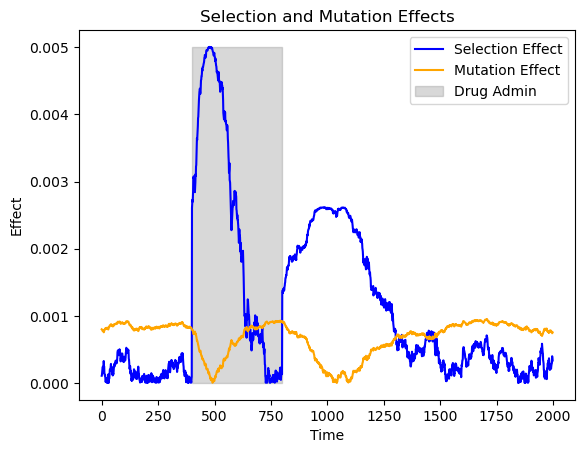

In [23]:
# Plot selection and mutation effects
plt.plot(sel_effect, label='Selection Effect', color='blue')
plt.plot(mut_effect, label='Mutation Effect', color='orange')
plt.xlabel('Time')
plt.ylabel('Effect')
plt.title('Selection and Mutation Effects')

# Fill the regions corresponding to drug administration periods
for start, end in drug_admin_periods:
    plt.fill_between(range(start, end), min(min(sel_effect), min(mut_effect)), max(max(sel_effect), max(mut_effect)), color='gray', alpha=0.3)

# Add a label for the drug administration period
plt.fill_between([], [], [], color='gray', alpha=0.3, label='Drug Admin')

plt.legend()
plt.show()